greedy route: [0, 4, 52, 78, 79, 88, 94, 30, 14, 92, 28, 17, 56, 60, 24, 42, 45, 75, 3, 76, 27, 36, 41, 67, 48, 20, 53, 16, 32, 74, 97, 34, 22, 19, 26, 39, 46, 81, 18, 72, 55, 82, 64, 83, 15, 70, 47, 8, 84, 49, 59, 85, 40, 63, 61, 7, 25, 23, 69, 90, 2, 31, 89, 1, 57, 65, 11, 68, 33, 38, 62, 9, 87, 13, 95, 54, 71, 86, 6, 77, 37, 93, 99, 35, 44, 91, 98, 96, 50, 51, 12, 66, 10, 58, 29, 73, 43, 5, 21, 80, 0]
distance: 523.7415420152441

randCount: 1
random route: [0, 50, 44, 52, 86, 82, 32, 12, 83, 41, 42, 17, 74, 66, 33, 93, 27, 45, 2, 60, 61, 16, 99, 11, 21, 54, 88, 3, 72, 91, 77, 67, 19, 58, 78, 96, 80, 57, 51, 64, 4, 47, 87, 13, 95, 59, 20, 38, 53, 25, 34, 89, 28, 65, 14, 39, 94, 40, 76, 79, 90, 30, 26, 22, 23, 55, 24, 81, 5, 36, 8, 63, 31, 35, 70, 62, 69, 97, 49, 18, 1, 84, 43, 98, 6, 48, 75, 92, 46, 15, 10, 85, 56, 37, 29, 9, 73, 71, 7, 68, 0]
distance: 2670.2664217010106

randCount: 2
random route: [0, 89, 99, 77, 14, 90, 30, 16, 83, 28, 29, 49, 80, 32, 19, 98, 55, 62, 92, 72, 6, 42

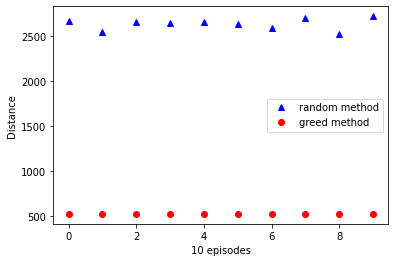

In [ ]:
import pandas as pd
import math

def Euclidean_Distance(A,B):
    #print(A,B)
    d = (A[1] - B[1]) ** 2 + (A[2] - B[2]) ** 2
    d = math.sqrt(d)
    return d

def Nearleast(dList, route):
    shortVal = 10e9
    shortIndex = -1
    for i in range(len(dList)):
        if shortVal > dList[i] and not i in route:
            #print(f"dList[i]: {dList[i]}")
            shortVal = dList[i]
            shortIndex = i
    #print(f"shortIndex: {shortIndex}, dList[i]: {dList[shortIndex]}")

    #print(shortVal, shortIndex)
    
    return shortVal, shortIndex



pMat = pd.read_csv("Input_data.csv")
pMat = pd.DataFrame(pMat)

#print(pMat)
#print(pMat.iloc[1][2])

n = pMat.shape[0]
dMat = [[0]*n for _ in range(n)]

for i in range(n):
    for j in range(i,n):
        if i == j:
            dMat[i][j] = 1e10
        else:
            dMat[i][j] = dMat[j][i] = Euclidean_Distance(pMat.iloc[i], pMat.iloc[j])

#print(*dMat, sep = '\n')
def greedyRoute():
    
    start = 0
    currentIndex = 0
    distance = 0
    route = [0]
    shortIndex = start
    for i in range(n - 1):
        shortVal, shortIndex = Nearleast(dMat[shortIndex], route)
        distance += shortVal
        route.append(shortIndex)
        #print(currentIndex, shortIndex, shortVal, distance)
        currentIndex = shortIndex
        


    route.append(start)
    distance += dMat[currentIndex][start]
    #print(currentIndex, start, dMat[currentIndex][start], distance)

    #print(len(route))
    print(f"greedy route: {route}")
    print(f"distance: {distance}\n")

    return distance, route

greedyDistance, greedyPath = greedyRoute()


import random

def randomRoute():
    currentIndex = 0
    distance = 0

    route = [x for x in range(1, 100)]
    random.shuffle(route)
    route = [0] + route + [0]
    #print(len(route))
    #print(route)

    for r in range(1, len(route) - 1):
        #print(currentIndex, route[r])
        distance += dMat[currentIndex][route[r]]

        currentIndex = route[r]


    print(f"random route: {route}")
    print(f"distance: {distance}\n")

    return distance


randDistances = []
for i in range(10):
    print(f"randCount: {i+1}")
    randDistances.append(randomRoute())


print(f"randDistances: {randDistances}")

import numpy as np
import matplotlib.pyplot as plt



plt.plot(randDistances, "b^")
plt.plot([greedyDistance] * 10, "ro")
plt.legend(['random method', 'greed method'])
plt.xlabel('10 episodes')
plt.ylabel('Distance')
plt.show()



In [ ]:
print(*dMat, sep = "\n")

In [ ]:
import random

route = [x for x in range(1, 100)]
random.shuffle(route)

print(len(route))
print(route)

99
[74, 70, 67, 23, 43, 71, 34, 45, 28, 16, 51, 90, 94, 47, 4, 32, 96, 5, 68, 14, 92, 85, 91, 84, 54, 55, 44, 88, 99, 97, 75, 11, 10, 7, 48, 59, 77, 29, 56, 69, 37, 86, 31, 78, 30, 9, 27, 61, 42, 98, 3, 41, 2, 72, 25, 36, 17, 53, 73, 60, 38, 95, 93, 89, 49, 18, 65, 15, 20, 39, 76, 57, 12, 1, 63, 80, 6, 26, 19, 83, 22, 82, 21, 13, 62, 64, 81, 66, 52, 87, 46, 40, 33, 50, 58, 24, 8, 79, 35]


In [ ]:
def get_total_distance(route: list):
    distance = 0
    for i in range(len(route)-1):
        #print(route[i], route[i+1], dMat[route[i]][route[i+1]], distance)
        distance += dMat[route[i]][route[i+1]]
    return distance

#바뀐 연결고리 부분만 재계산
def calculate_2opt_new_path_cost(old_path: list, old_cost: int, i: int, k: int):
    cost = old_cost \
        - dMat[old_path[i]][old_path[i - 1]] \
        - dMat[old_path[k]][old_path[k + 1]] \
        + dMat[old_path[i]][old_path[k + 1]] \
        + dMat[old_path[i - 1]][old_path[k]]

    return cost


#index i부터 k까지 뒤집는다.
#시작위치와 끝위치는 바뀌면 안되므로 i는 1 이상, k는 len(path)-2 이하
def opt2_swap(path: list, i: int  ,k: int):
    new_path = path[:i] + path[k:i-1:-1] + path[k+1:]
    return new_path

#시작노드와 마지막노드는 교환대상으로 삼지않음
def TwoOpt(pathNcost: tuple):

    loop_time = 0
    best_cost = pathNcost[0]
    best_path = pathNcost[1][::]
    while True:
        loop_time += 1
        change = False
        con2 = False
        con1 = False
        for i in range(1,n-2):
            for k in range(i+2,n):
                new_path = opt2_swap(best_path, i ,k)
                new_cost = calculate_2opt_new_path_cost(best_path, best_cost, i, k)
                #print(loop_time, i,k,best_cost)
                if new_cost < best_cost:
                    best_path = new_path
                    best_cost = new_cost
                    change = True #교체가 일어나면 while문 continue, 한번도 교체가 일어나지않으면 종료
                if change:
                    continue

        if not change:
            break

    return (best_cost, best_path)

#print(greedyPath)
dis, path = TwoOpt((greedyDistance, greedyPath))
#print(len(path))
print(f"2-opt route: {path}")
print(f"distance: {dis}\n")
asdf = [0, 44, 79, 88, 94, 30, 14, 92, 28, 17, 56, 60, 24, 42, 45, 75, 3, 91, 76, 27, 36, 41, 67, 48, 20, 53, 16, 32, 74, 97, 34, 22, 19, 26, 39, 46, 81, 18, 72, 55, 82, 64, 83, 15, 84, 8, 47, 70, 73, 80, 21, 5, 43, 29, 58, 10, 66, 12, 51, 50, 96, 98, 85, 59, 49, 40, 63, 61, 7, 25, 23, 69, 90, 2, 31, 89, 1, 57, 65, 38, 33, 68, 11, 62, 9, 87, 13, 95, 6, 86, 71, 54, 93, 37, 77, 99, 35, 78, 52, 4, 0]
print(len(asdf))


2-opt route: [0, 4, 99, 35, 37, 93, 77, 86, 71, 54, 6, 13, 95, 87, 9, 62, 11, 68, 33, 38, 65, 57, 1, 89, 31, 2, 90, 69, 50, 51, 12, 66, 10, 58, 43, 5, 21, 80, 73, 29, 96, 98, 23, 25, 7, 61, 63, 40, 85, 59, 49, 84, 8, 47, 70, 15, 83, 64, 82, 55, 72, 18, 81, 46, 39, 26, 19, 22, 34, 97, 74, 32, 16, 53, 20, 48, 67, 41, 36, 27, 76, 3, 75, 45, 42, 24, 60, 56, 17, 28, 92, 14, 30, 94, 88, 79, 78, 52, 44, 91, 0]
distance: 437.7822306603062

101
